## Use Autoencoder to implement anomaly detection. Build the model by using:
a. Import required libraries<br>
b. Upload / access the dataset<br>
c. Encoder converts it into latent representation<br>
d. Decoder networks convert it back to the original input<br>
e. Compile the models with Optimizer, Loss, and Evaluation Metrics<br>


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
path = r"C:\Users\Jayesh Mahajan\Desktop\Dl\ecg-csv\ecg.csv"
df = pd.read_csv(path,header=None)

In [3]:
df = df.drop(140, axis=1) 
df

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.513738,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.123739,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932


In [4]:
from sklearn.preprocessing import StandardScaler

StandardScaler = StandardScaler()
df = StandardScaler.fit_transform(df)

In [5]:
# Preprocess the data
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size=0.2)

In [6]:
print(x_train.shape)
print(x_test.shape)

(3998, 140)
(1000, 140)


In [7]:
from keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, models

In [8]:
encoder = tf.keras.models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu')
])
        
decoder = tf.keras.models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')  # Use linear activation for reconstruction
])
        
model = tf.keras.models.Sequential([
    encoder,
    decoder
])

In [9]:
model.compile(optimizer='adam', loss ='mean_squared_error')

In [10]:
history = model.fit(
    x_train, 
    x_train, 
    validation_data=(x_test,x_test),
    epochs=10,
    batch_size = 30,
    shuffle=True
)

Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.7651 - val_loss: 0.5674
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3739 - val_loss: 0.3865
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2865 - val_loss: 0.3336
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2480 - val_loss: 0.2975
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2204 - val_loss: 0.2681
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2029 - val_loss: 0.2492
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1901 - val_loss: 0.2380
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1806 - val_loss: 0.2314
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1737 - val_loss: 0.2229
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1683 - val_loss: 0.2159


<Axes: >

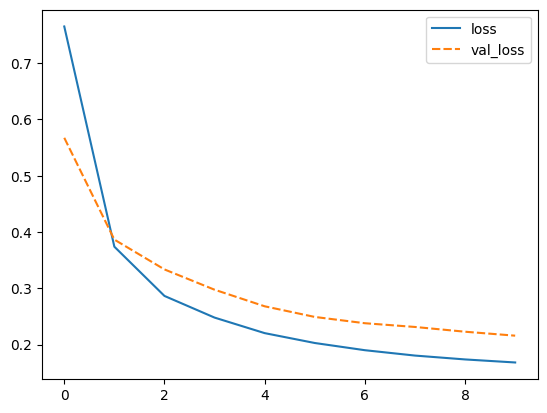

In [12]:
import seaborn as sns
sns.lineplot(model.history.history)

In [13]:
predictions = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(x_test,predictions,multioutput='raw_values')
print(mse)

[0.58962992 0.42890536 0.29228875 0.28256116 0.3403164  0.50442996
 0.6639718  0.57197403 0.4840908  0.32695602 0.21695201 0.25135474
 0.2703058  0.23001107 0.21063319 0.16518192 0.14501311 0.1307967
 0.11811492 0.13350571 0.11190302 0.12583783 0.11850584 0.10390534
 0.09441074 0.08266973 0.07009464 0.07450532 0.07337812 0.11409997
 0.12576705 0.1297375  0.11861408 0.11644742 0.0892649  0.07965728
 0.07976802 0.08135359 0.09179409 0.10713659 0.14984354 0.17051491
 0.21103697 0.25792628 0.28900543 0.33990988 0.30909795 0.2930099
 0.28840496 0.29942578 0.31855066 0.28150433 0.29224348 0.33125291
 0.31151538 0.33269972 0.33890597 0.32269798 0.37260196 0.39444272
 0.38004371 0.36069594 0.37094971 0.28317676 0.2442754  0.20499788
 0.17198554 0.15709569 0.16698511 0.16980792 0.25971001 0.2269144
 0.16602659 0.19311762 0.17931862 0.20378373 0.21990848 0.33371528
 0.22907274 0.22845757 0.24309789 0.27763541 0.1874313  0.17111451
 0.18355656 0.20194759 0.19168404 0.18698666 0.20492727 0.1889656

In [15]:
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed
threshold

np.float64(0.39616585575397634)

In [16]:
anomalies = mse > threshold

In [17]:
# Calculate the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 7


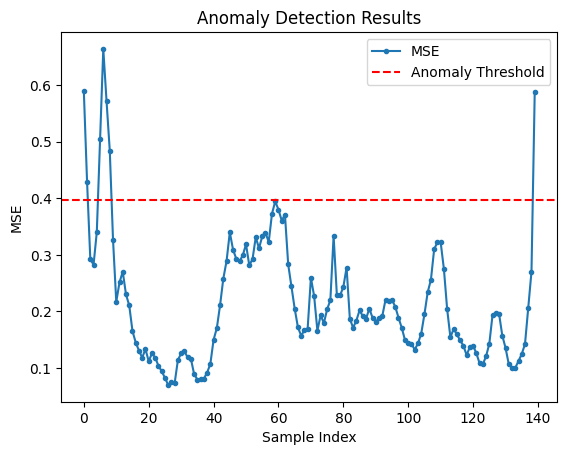

In [18]:
#Plot the anomalies
import matplotlib.pyplot as plt

plt.plot(mse, marker='o', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

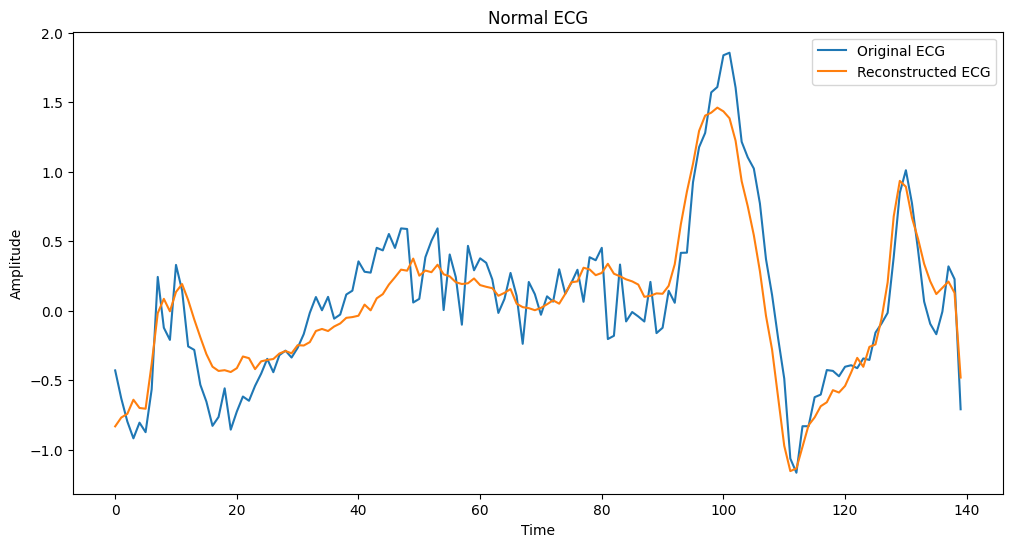

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(x_test[0], label='Original ECG')
plt.plot(predictions[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

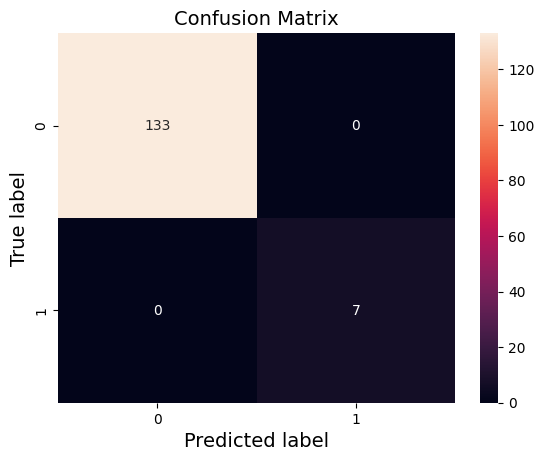

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

sns.heatmap(confusion_matrix(anomalies, anomalies), annot = True, fmt = 'd')
plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.show()